Medical Insurance Cost Prediction using Machine Learning with Python.

Regression Model:
Linear Regression
Language Python

Problem Statement: Predict the medical Insurence cost a person.

Workflow- get the data---> Data Analysis ----> Data Preprocessing ---> Train Test Split-----> Tarin the model(Linera Regression Model) ----> Trained linear Data----> Test it with new data ----> Prediction Insurence cost.





In [1]:
# Import the Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Read the data set using pandas for data collection and Analysis.

In [2]:
#nrows
insurence_dataset=pd.read_csv("../input/medical-cost-personal-dataset/insurance.csv")
#insurence_dataset.shape
insurence_dataset.head(2)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523


In [3]:
insurence_dataset['age'].value_counts()
insurence_dataset['smoker']

# Find the total number of smokers who are female.

girls_smoker=insurence_dataset[['age','smoker','sex','bmi','children']] [insurence_dataset['sex'] == "female"]
girls_smoker.shape

# Find the total number of smokers who are male.
#boys_smoker=insurence_dataset[['age','smoker','sex','bmi']] [insurence_dataset['sex'] == "male"]
#boys_smoker


(662, 5)

**GET The Information from the dataset**

In [4]:
insurence_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**Categorical Features in the data set are mentioned are below.**

 ###  Column   
---  ------   
 0   age        
 1   sex      category  
 2   bmi       
 3   children   
 4   smoker   Category
 5   region   category
 6   charges  Target

In [5]:
#Find the missing values in each coloumn
insurence_dataset.isnull().sum()
insurence_dataset.head(5)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


**Data analysis for the dataset**

In [6]:
#Statistical Data Analysis
#describe function gives the mean,std, min max, percentage of the numarical values coloumns

insurence_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


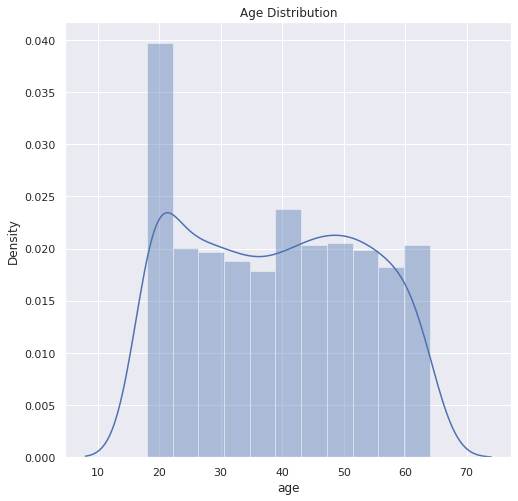

In [7]:
# Find the distribution values of age column

sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurence_dataset['age'])
plt.title('Age Distribution')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


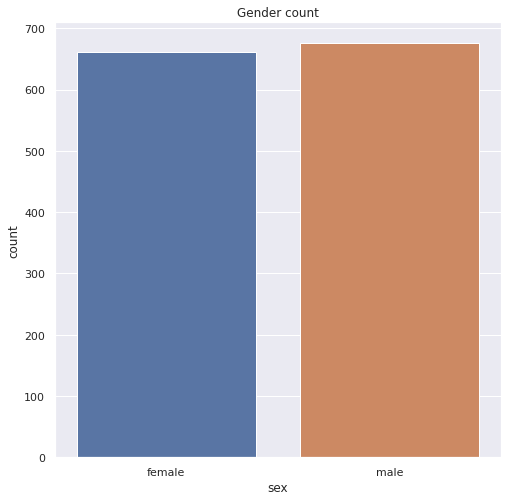

In [8]:
# Find the distribution values of GENDER column it is categorial coloumn in which can't use distplot plot. 
#we need to use count plot

plt.figure(figsize=(8,8))
sns.countplot(insurence_dataset['sex'])
plt.title('Gender count')
plt.show()

In [9]:
insurence_dataset['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


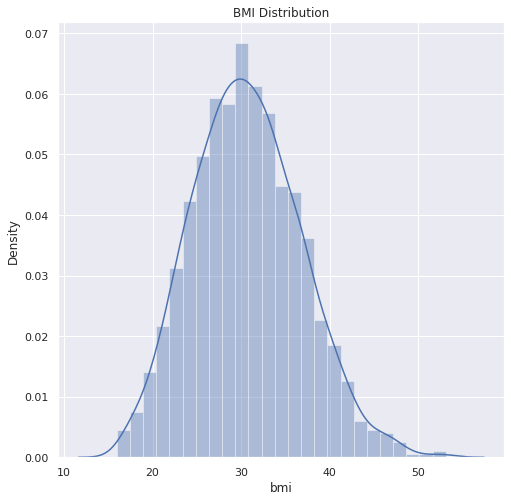

In [10]:
# Find the distribution values of age BMI
#Normal BMI Range for a person is 18.5 to 24.9
sns.set()
plt.figure(figsize=(8,8))
sns.distplot(insurence_dataset['bmi'])
plt.title('BMI Distribution')
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


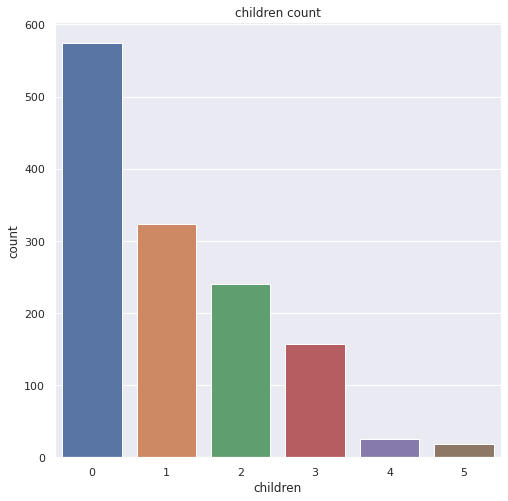

In [11]:
# Find the distribution values of Children column 
plt.figure(figsize=(8,8))
sns.countplot(insurence_dataset['children'])
plt.title('children count')
plt.show()

In [12]:
insurence_dataset['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


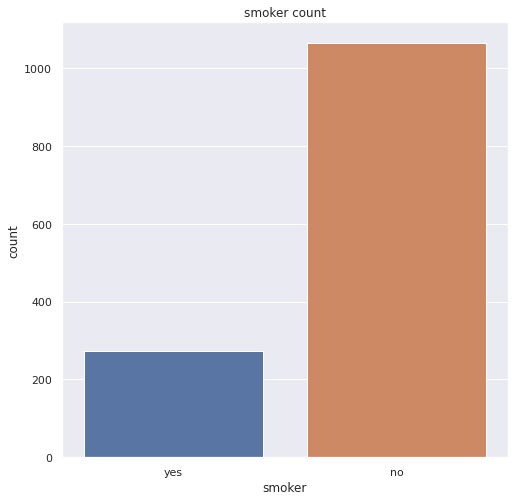

In [13]:
#Find the distribution values of Children column 
plt.figure(figsize=(8,8))
sns.countplot(insurence_dataset['smoker'])
plt.title('smoker count')
plt.show()

In [14]:
insurence_dataset['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


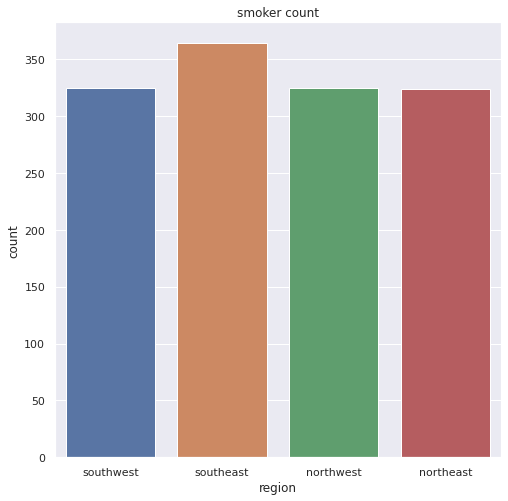

In [15]:
#Find the distribution values of Region column 
plt.figure(figsize=(8,8))
sns.countplot(insurence_dataset['region'])
plt.title('smoker count')
plt.show()

In [16]:
insurence_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


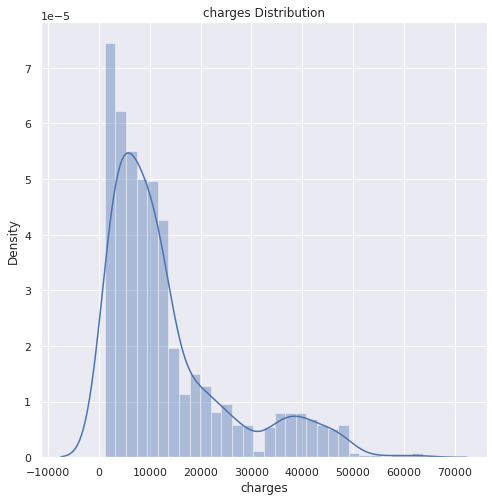

In [17]:
# Find the distribution values of Charges column


plt.figure(figsize=(8,8))
sns.distplot(insurence_dataset['charges'])
plt.title('charges Distribution')
plt.show()

**DATA PREPROCESSING**



In [18]:
#Encoding sex coloumn
insurence_dataset.replace({'sex':{'male':0,'female':1}},inplace=True)

#Encoding smoker coloumn
insurence_dataset.replace({'smoker':{'yes':0,'no':1}},inplace=True)

#Encoding smoker coloumn
insurence_dataset.replace({'region':{'southeast':0,'southwest':1,'northwest':3,'northeast':4}},inplace=True)

insurence_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,4,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [19]:
#Split the features and Target

#x will be the feature and y will the target
#axis=1 col
#axis=0 row

x=insurence_dataset.drop(columns='charges',axis=1)
y=insurence_dataset['charges']
print(y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


**Spliting the data into Training data and Testing data**


In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=2)
print("The orginal data is",x.shape)
print("The Test data is",X_test.shape)
print("The Training Test data is",X_train.shape)

The orginal data is (1338, 6)
The Test data is (268, 6)
The Training Test data is (1070, 6)


**Traing the Model Using Linear Regression Model**

In [21]:
#Loading the Linear Regression model
regressor=LinearRegression()


In [22]:
# we are mapping feature and lable of traing data.
regressor.fit(X_train,Y_train)


LinearRegression()

**Find the model Evaluation**

In [23]:
#Prediction on Training data.

training_data_prediction=regressor.predict(X_train)
training_data_prediction

array([  768.74087588,  9217.59406596, 13097.50035419, ...,
       17268.71689985,  9475.3650854 , 14081.92521502])

**Find the R square value. for Model Evalution**

In [24]:
#R squared Value for training data

r2_train= metrics.r2_score(Y_train,training_data_prediction)
print("R squre value is",r2_train)

R squre value is 0.7518713667681967


In [25]:
#Prediction on Training data.

test_data_prediction=regressor.predict(X_test)
test_data_prediction

array([ 1808.71060083, 11885.58357019, 10381.38451557,  2138.55568659,
        8161.72351436, 11031.42510727,  3417.72268253,  1002.93439142,
       12089.01474462,  9522.60973365, 11534.37027556,  4829.6186408 ,
       29812.16053972,  -509.91982153, 12749.66653651, 13126.60730609,
        4107.77765615,  7800.63469771, 29302.83104271,  2691.13385434,
       12398.13767543,  2144.10172938, 34385.3733981 , 32057.62967135,
       30236.25217645,  8871.5728404 ,  2219.00556487, 15203.42741426,
        6467.04942025,  1970.83324718,  9415.70193549,  5703.59277143,
        4299.16638759,  4888.61641641,  9456.99718234,  4541.60474518,
       29834.7914107 ,  6682.78299004, 27549.12488137, 13886.89501819,
         181.41131275, 28319.62010291,  7764.40948636,  1359.85442658,
       10198.7842484 ,  7919.55242866, 11497.95482935,  8109.20251368,
       10713.70162229, 13716.94274715,  6073.11080421,  -887.84531536,
       26244.09505222, 37091.20059084,  7249.93931109, 17819.30100085,
      

In [26]:
#R squared Value for training data

r2_test= metrics.r2_score(Y_test,test_data_prediction)
print("R squre value for Test data",r2_train)

R squre value for Test data 0.7518713667681967


**BUILDING THE PREDICTIVE SYSTEM FOR MEDICAL INSURENCE**

In [27]:
age=31
sex=1
bmi=25.74
children=0
smoker=1
region=0

input_data=(age,sex,bmi,children,smoker,region)

#changing input data into numpy array
input_data_as_numpy=np.asanyarray(input_data)

#Reshape the array
input_data_reshape=input_data_as_numpy.reshape(1,-1)

prediction=regressor.predict(input_data_reshape)
print("The insurence cost is USD",prediction[0])
3756.6216

The insurence cost is USD 3637.971637321589


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


3756.6216